In [0]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('coctrimd.csv')
data.head()

Content              Name
0                                             superb  Sunil Jayasingha
1                                                wow   Ashik Sagayaraj
2                                             Supper          DJ Sagar
3                                               Good    Rishabh Sharma
4  hi supercell what if you add a new feature lik...       mark valdez

In [9]:
addon = ['Content', 'Name']
data[addon].describe()

Content                 Name
count        74                   74
unique       67                   74
top     awesome  Sachin kumar Thakur
freq          3                    1

In [10]:
for col in addon:
  dummies = pd.get_dummies(data[col], prefix=col)
  data = pd.concat([data, dummies], axis=1)
  data.drop(col, axis=1, inplace=True)

data.head()  


Content_Awesome  Content_Awesome game  ...  Name_wwe mayhem  Name_yogesh sharma
0                0                     0  ...                0                   0
1                0                     0  ...                0                   0
2                0                     0  ...                0                   0
3                0                     0  ...                0                   0
4                0                     0  ...                0                   0

[5 rows x 141 columns]

In [0]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [0]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

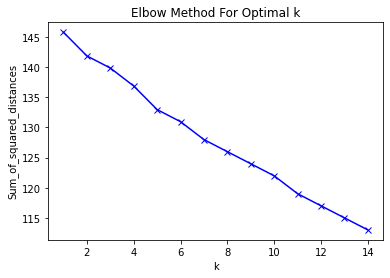

In [13]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()